# Preliminaries
Run the next 3 cells to load the data, this might take while.

In [23]:
# Run this cell if opening a new Colab notebook
! git clone https://github.com/niekheinen/ecg-classification.git
% cd ecg-classification
! pip install wfdb

Cloning into 'ecg-classification'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 20072 (delta 23), reused 28 (delta 9), pack-reused 20021
Receiving objects: 100% (20072/20072), 180.39 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (1768/1768), done.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ecgc

import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import itertools
import wfdb
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model

In [3]:
data = ecgc.load_data('ecgc/mitdb/')

Loading beats took: 26.5s
Reshaping the signals took: 846.4s


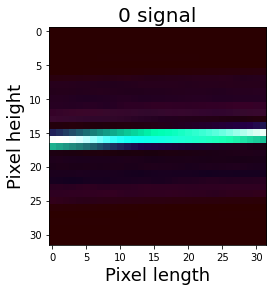

In [6]:
tensor = data['tests'][0][20]
ecgc.vizualise_tensor(tensor, data['tests'][1][20])


# Train Networks

In [ ]:
net = tf.keras.applications.ResNet50V2(
    input_shape=(36,36,3,),
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling='max',
)

for layer in net.layers:
    layer.trainable = False

x = net.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation= 'relu')(x)
# x = Dense(64, activation= 'relu')(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=net.input, outputs=predictions)
# model.summary()
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(data['train'][0], data['train'][1], epochs=30, verbose = 2)

Epoch 1/30
1607/1607 - 38s - loss: 4.6757 - accuracy: 0.8959
Epoch 2/30
1607/1607 - 37s - loss: 3.2940 - accuracy: 0.9197
Epoch 3/30
1607/1607 - 38s - loss: 3.7441 - accuracy: 0.9229
Epoch 4/30
1607/1607 - 38s - loss: 3.8146 - accuracy: 0.9290
Epoch 5/30
1607/1607 - 38s - loss: 3.2995 - accuracy: 0.9334
Epoch 6/30


In [ ]:
model.save("/content/drive/My Drive/ECG_Classifier/models/ResNet50_ba.h5")

In [ ]:

! ls "/content/drive/My Drive/ECG_Classifier/models"

MobileNetV2_small.h5  ResNet50_ba_1tl.h5  ResNet50_small_V1.h5


In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/MobileNetV2_1_88.h5")

In [ ]:
ecgc.evaluate_model(model, data['tests'][0], data['tests'][1], keras_evaluation=True)